## [作業重點]
清楚了解 L1, L2 的意義與差異為何，並了解 LASSO 與 Ridge 之間的差異與使用情境

## 作業

請閱讀相關文獻，並回答下列問題

[脊回歸 (Ridge Regression)](https://blog.csdn.net/daunxx/article/details/51578787)
[Linear, Ridge, Lasso Regression 本質區別](https://www.zhihu.com/question/38121173)

1. LASSO 回歸可以被用來作為 Feature selection 的工具，請了解 LASSO 模型為什麼可用來作 Feature selection
2. 當自變數 (X) 存在高度共線性時，Ridge Regression 可以處理這樣的問題嗎?


LASSO is L1,

* $L1 = \sum |weight| $
* $Loss = argmin(y-w*x)^2 + \alpha*L1$
* When we are increasing alpha, then more numbers of coefficient of polynomial becoming zero, we can select non-zero coefficient items, and remove those zero items.
Ridge is L2,

* $L2 = \sum (weight)^2 $
* $Loss = argmin(y-w*x)^2 + \lambda*L2$
* in some domains, the number of independent variables is many, as well as we are not sure which of the independent variables influences dependent variable. In this kind of scenario, ridge regression plays a better role than linear regression.

设计矩阵为：
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.14285714 0.125      0.11111111 0.1        0.09090909]
 [0.125      0.11111111 0.1        0.09090909 0.08333333]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308]
 [0.1        0.09090909 0.08333333 0.07692308 0.07142857]]

 alpha的值为：
[1.00000000e-10 1.09698580e-10 1.20337784e-10 1.32008840e-10
 1.44811823e-10 1.58856513e-10 1.74263339e-10 1.91164408e-10
 2.09704640e-10 2.30043012e-10 2.52353917e-10 2.76828663e-10
 3.03677112e-10 3.33129479e-10 3.65438307e-10 4.00880633e-10
 4.39760361e-10 4.82410870e-10 5.29197874e-10 5.80522552e-10
 6.36824994e-10 6.98587975e-10 7.66341087e-10 8.40665289e-10
 9.22197882e-10 1.01163798e-09 1.1

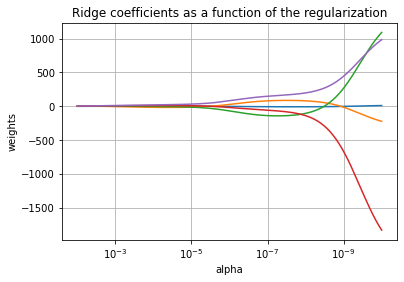

In [3]:
## 脊回归测试代码
## 这里需要先生成一个线性相关的设计矩阵X，再使用脊回归对其进行建模
## 脊回归中最重要的就是参数alpha的选择，本例显示了不同的alpha下
## 模型参数omega不同的结果

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# 这里设计矩阵X是一个希尔伯特矩阵（Hilbert matrix）
# 其元素A（i,j）=1(i + j -1),i和j分别为其行标和列标
# 希尔伯特矩阵是一种数学变换矩阵，正定，且高度病态
# 即，任何一个元素发生一点变动，整个矩阵的行列式的值和逆矩阵都会发生巨大变化
# 这里设计矩阵是一个10x5的矩阵，即有10个样本，5个变量
X = 1. / (np.arange(1, 6) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

print('设计矩阵为：')
print(X)

# alpha 取值为10^（-10）到10^（-2）之间的连续的200个值
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print('\n alpha的值为：')
print(alphas)

# 初始化一个Ridge Regression
clf = linear_model.Ridge(fit_intercept=False)

# 参数矩阵，即每一个alpha对于的参数所组成的矩阵
coefs = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alphas, coefs)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
